In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os 
from os.path import dirname
import re
import json 
import time

# Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Parameter
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
%matplotlib inline

# Custom modules
from data_utils import create_csv, split_train_test
from data_loader import DataGenerator, CroperNormalizer
from models import BasicConvnet, MultiHeadConvnet
from classifier import Classifier

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

ImportError: No module named torch

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="3"

## 1 - Dataset 

In [3]:
dataset_name = 'blender_v3_croped_normalized_dmap_300_100'
datas_list = ['depth_map', 'annotations']
datas = pd.read_csv(dataset_name + '.csv', index_col=0)

In [4]:
train_split = 0.8
train, test = split_train_test(datas, train_split)
train_dataset = DataGenerator(dataframe=train,
                              dataset_name=dataset_name,
                              datas_list=datas_list)
test_dataset = DataGenerator(dataframe=test,
                             dataset_name=dataset_name,
                             datas_list=datas_list)

In [5]:
batch_size = 32
shuffle = False

In [6]:
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=shuffle)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size, 
                         shuffle=shuffle)

## 2 - Model

In [7]:
simple_convnet = BasicConvnet(target_size=4)

## 3 - Classifier

In [8]:
volume_estimator = Classifier(model=simple_convnet, train_loader=train_loader,
                              test_loader=test_loader, 
                              cuda=True, target=['height', 'width', 'length', 'volume'],
                              is_multi_head=False)

## 4 - Training & Evaluation

In [9]:
lr = 1e-2
num_epoch = 50

In [10]:
volume_estimator.train(lr=lr, num_epoch=num_epoch)

learning rate : 0.05
epoch: 1, step: 20 out of 125, running average train loss: 721.552783203, running train normalized error: 0.910101252794,elapsed time: 0.416076183319
epoch: 1, step: 40 out of 125, running average train loss: 635.044392395, running train normalized error: 0.952494859695,elapsed time: 0.810511112213
epoch: 1, step: 60 out of 125, running average train loss: 597.090597026, running train normalized error: 0.986392577489,elapsed time: 1.19835996628
epoch: 1, step: 80 out of 125, running average train loss: 584.154740524, running train normalized error: 1.01869266555,elapsed time: 1.60715103149
epoch: 1, step: 100 out of 125, running average train loss: 571.487982483, running train normalized error: 1.00518842757,elapsed time: 2.01746201515
epoch: 1, step: 120 out of 125, running average train loss: 559.71992569, running train normalized error: 1.00895504306,elapsed time: 2.40370106697
epoch : 1, average test loss: 460.210394859,average test error : 1.05078533664
learni

epoch: 9, step: 60 out of 125, running average train loss: 274.916022237, running train normalized error: 0.439076825976,elapsed time: 1.19040894508
epoch: 9, step: 80 out of 125, running average train loss: 278.677032089, running train normalized error: 0.444985247031,elapsed time: 1.58746910095
epoch: 9, step: 100 out of 125, running average train loss: 277.623861847, running train normalized error: 0.43492584765,elapsed time: 1.98502707481
epoch: 9, step: 120 out of 125, running average train loss: 276.593955104, running train normalized error: 0.43158425341,elapsed time: 2.37638807297
epoch : 9, average test loss: 279.57004261,average test error : 0.552590584382
learning rate : 0.01
epoch: 10, step: 20 out of 125, running average train loss: 267.317855835, running train normalized error: 0.454332257807,elapsed time: 0.387731075287
epoch: 10, step: 40 out of 125, running average train loss: 259.456234741, running train normalized error: 0.425143992156,elapsed time: 0.800373077393
ep

epoch: 17, step: 100 out of 125, running average train loss: 235.973488464, running train normalized error: 0.38355329901,elapsed time: 1.97277903557
epoch: 17, step: 120 out of 125, running average train loss: 234.736842728, running train normalized error: 0.380721811454,elapsed time: 2.3675429821
epoch : 17, average test loss: 217.380056381,average test error : 0.356553749647
learning rate : 0.01
epoch: 18, step: 20 out of 125, running average train loss: 223.057138062, running train normalized error: 0.347200337052,elapsed time: 0.391767978668
epoch: 18, step: 40 out of 125, running average train loss: 215.737606049, running train normalized error: 0.335793211311,elapsed time: 0.793370008469
epoch: 18, step: 60 out of 125, running average train loss: 220.224654134, running train normalized error: 0.338375303646,elapsed time: 1.23461604118
epoch: 18, step: 80 out of 125, running average train loss: 219.611797523, running train normalized error: 0.341472383775,elapsed time: 1.63911104

epoch : 25, average test loss: 170.165943861,average test error : 0.315226347651
learning rate : 0.002
epoch: 26, step: 20 out of 125, running average train loss: 164.617274475, running train normalized error: 0.286964609474,elapsed time: 0.428478002548
epoch: 26, step: 40 out of 125, running average train loss: 160.950839615, running train normalized error: 0.277718520537,elapsed time: 0.838369846344
epoch: 26, step: 60 out of 125, running average train loss: 163.561148198, running train normalized error: 0.273923971752,elapsed time: 1.23612904549
epoch: 26, step: 80 out of 125, running average train loss: 163.5065732, running train normalized error: 0.278131560422,elapsed time: 1.65716600418
epoch: 26, step: 100 out of 125, running average train loss: 162.238128891, running train normalized error: 0.275125512332,elapsed time: 2.06805801392
epoch: 26, step: 120 out of 125, running average train loss: 162.211194928, running train normalized error: 0.276958325878,elapsed time: 2.5075829

epoch: 34, step: 40 out of 125, running average train loss: 148.733208466, running train normalized error: 0.258276746795,elapsed time: 0.802757978439
epoch: 34, step: 60 out of 125, running average train loss: 151.883156077, running train normalized error: 0.255925245335,elapsed time: 1.21337080002
epoch: 34, step: 80 out of 125, running average train loss: 152.531657028, running train normalized error: 0.260548445769,elapsed time: 1.60946679115
epoch: 34, step: 100 out of 125, running average train loss: 150.88696701, running train normalized error: 0.25750618577,elapsed time: 1.99937677383
epoch: 34, step: 120 out of 125, running average train loss: 150.662938817, running train normalized error: 0.258938303466,elapsed time: 2.3869509697
epoch : 34, average test loss: 157.350902081,average test error : 0.29137407057
learning rate : 0.002
epoch: 35, step: 20 out of 125, running average train loss: 151.553722, running train normalized error: 0.261043205112,elapsed time: 0.410542011261


epoch: 42, step: 80 out of 125, running average train loss: 137.11481123, running train normalized error: 0.239577370323,elapsed time: 1.58133292198
epoch: 42, step: 100 out of 125, running average train loss: 135.36559761, running train normalized error: 0.236411357522,elapsed time: 1.97985696793
epoch: 42, step: 120 out of 125, running average train loss: 134.959129143, running train normalized error: 0.238633576532,elapsed time: 2.37652993202
epoch : 42, average test loss: 142.32091403,average test error : 0.268847784959
learning rate : 0.0004
epoch: 43, step: 20 out of 125, running average train loss: 136.258714676, running train normalized error: 0.243953184783,elapsed time: 0.404218912125
epoch: 43, step: 40 out of 125, running average train loss: 133.196722412, running train normalized error: 0.237467985973,elapsed time: 0.814545869827
epoch: 43, step: 60 out of 125, running average train loss: 134.975151952, running train normalized error: 0.235455230375,elapsed time: 1.2195048

epoch: 50, step: 100 out of 125, running average train loss: 129.947800293, running train normalized error: 0.232234023064,elapsed time: 1.87362599373
epoch: 50, step: 120 out of 125, running average train loss: 129.933142853, running train normalized error: 0.235225148623,elapsed time: 2.24534296989
epoch : 50, average test loss: 138.673775434,average test error : 0.263218471315
Training finished !


## 5 - Results

## 5.1 - Simple convnet

####  Volume estimation

In [12]:
train_loss = volume_estimator.agr_train_loss
test_loss = volume_estimator.agr_test_loss
train_average_error = volume_estimator.train_agr_normalized_error
test_average_error = volume_estimator.test_agr_normalized_error

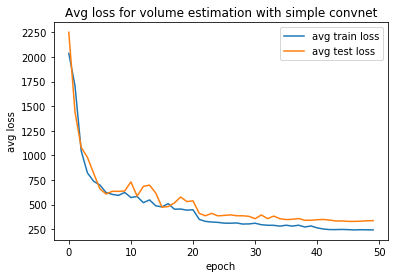

In [13]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['avg train loss', 'avg test loss'])
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.title('Avg loss for volume estimation with simple convnet')
plt.show()

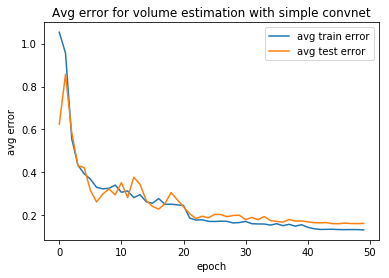

In [14]:
plt.plot(train_average_error)
plt.plot(test_average_error)
plt.legend(['avg train error', 'avg test error'])
plt.xlabel('epoch')
plt.ylabel('avg error')
plt.title('Avg error for volume estimation with simple convnet')
plt.show()

In [24]:
test_model = False

In [25]:
if test_model:
    model_name = 'volume_estimator_50_epoch_lr_1e-2_simple_convnet_L1_loss'
    volume_estimator.load_model(model_name)
    volume_estimator.test(0)

epoch : 1, average test loss: 247.617204905,average test error : 0.130538558355


#### Width estimation

In [12]:
train_loss = volume_estimator.agr_train_loss
test_loss = volume_estimator.agr_test_loss
train_average_error = volume_estimator.train_agr_normalized_error
test_average_error = volume_estimator.test_agr_normalized_error

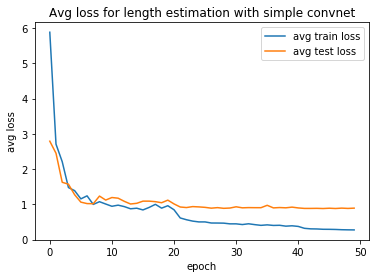

In [13]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['avg train loss', 'avg test loss'])
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.title('Avg loss for length estimation with simple convnet')
plt.show()

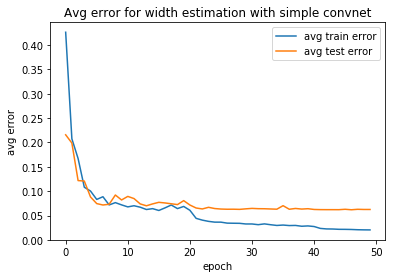

In [14]:
plt.plot(train_average_error)
plt.plot(test_average_error)
plt.legend(['avg train error', 'avg test error'])
plt.xlabel('epoch')
plt.ylabel('avg error')
plt.title('Avg error for width estimation with simple convnet')
plt.show()

In [9]:
test_model = False

In [10]:
if test_model:
    model_name = 'width_estimator_50_epoch_lr_1e-2_simple_convnet_L1_loss'
    volume_estimator.load_model(model_name)
    volume_estimator.test(0)

epoch : 1, average test loss: 0.375733038411,average test error : 0.0281193997653


#### Height estimation

In [13]:
train_loss = volume_estimator.agr_train_loss
test_loss = volume_estimator.agr_test_loss
train_average_error = volume_estimator.train_agr_normalized_error
test_average_error = volume_estimator.test_agr_normalized_error

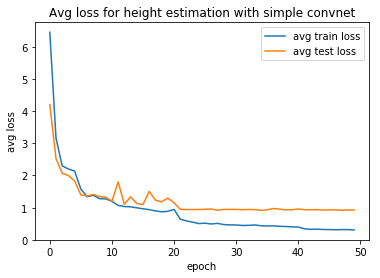

In [14]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['avg train loss', 'avg test loss'])
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.title('Avg loss for height estimation with simple convnet')
plt.show()

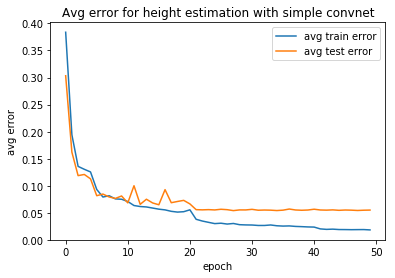

In [15]:
plt.plot(train_average_error)
plt.plot(test_average_error)
plt.legend(['avg train error', 'avg test error'])
plt.xlabel('epoch')
plt.ylabel('avg error')
plt.title('Avg error for height estimation with simple convnet')
plt.show()

In [18]:
test_model = False

In [19]:
if test_model:
    model_name = 'height_estimator_50_epoch_lr_1e-2_simple_convnet_L1_loss'
    volume_estimator.load_model(model_name)
    volume_estimator.test(0)

epoch : 1, average test loss: 0.439243162051,average test error : 0.0274133820203


####  Length estimation

In [13]:
train_loss = volume_estimator.agr_train_loss
test_loss = volume_estimator.agr_test_loss
train_average_error = volume_estimator.train_agr_normalized_error
test_average_error = volume_estimator.test_agr_normalized_error

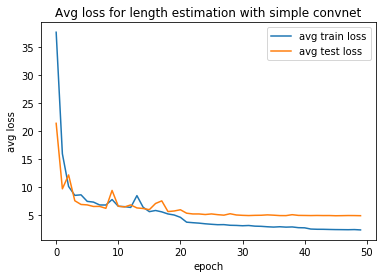

In [14]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['avg train loss', 'avg test loss'])
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.title('Avg loss for length estimation with simple convnet')
plt.show()

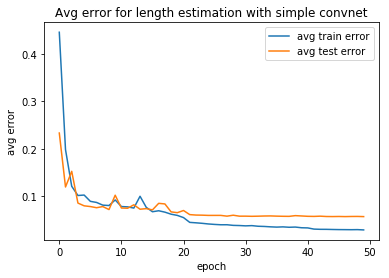

In [15]:
plt.plot(train_average_error)
plt.plot(test_average_error)
plt.legend(['avg train error', 'avg test error'])
plt.xlabel('epoch')
plt.ylabel('avg error')
plt.title('Avg error for length estimation with simple convnet')
plt.show()non_normalized_width_estimator_50_epoch_lr_1e-2_simple_convnet_L1_loss

In [15]:
test_model = False

In [16]:
if test_model:
    model_name = 'length_estimator_50_epoch_lr_1e-2_simple_convnet_L1_loss'
    volume_estimator.load_model(model_name)
    volume_estimator.test(0)

epoch : 1, average test loss: 2.73273338005,average test error : 0.0328886483621


## 5.2 - Multi head convnet

#### Volume 

In [13]:
train_loss = volume_estimator.agr_train_loss
test_loss = volume_estimator.agr_test_loss
train_average_error = volume_estimator.train_agr_normalized_error
test_average_error = volume_estimator.test_agr_normalized_error

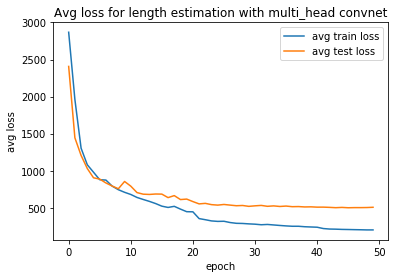

In [14]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['avg train loss', 'avg test loss'])
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.title('Avg loss for length estimation with multi_head convnet')
plt.show()

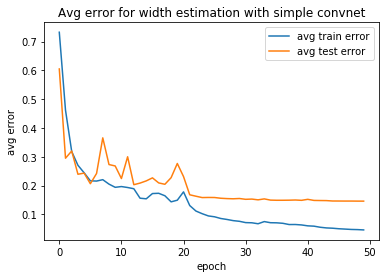

In [14]:
plt.plot(train_average_error)
plt.plot(test_average_error)
plt.legend(['avg train error', 'avg test error'])
plt.xlabel('epoch')
plt.ylabel('avg error')
plt.title('Avg error for width estimation with simple convnet')
plt.show()

In [15]:
train_loss = volume_estimator.agr_train_loss
test_loss = volume_estimator.agr_test_loss
train_average_error = volume_estimator.train_agr_normalized_error
test_average_error = volume_estimator.test_agr_normalized_error